## Importing Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns; sns.set()
from pandas_profiling.profile_report import ProfileReport
import warnings; warnings.filterwarnings('ignore')

%matplotlib inline
#plt.rcParams["figure.figsize"] = (10,6)

## Loading Dataset

In [7]:
df = pd.read_csv("titanic.csv")
df.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [10]:
df_red = df[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']]
df_red.head()

Survived  Pclass     Sex   Age  Parch     Fare
0         0       3    male  22.0      0   7.2500
1         1       1  female  38.0      0  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      0  53.1000
4         0       3    male  35.0      0   8.0500

In [11]:
df_red.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
dtype: int64

In [12]:
df_red.dropna()

Survived  Pclass     Sex   Age  Parch     Fare
0           0       3    male  22.0      0   7.2500
1           1       1  female  38.0      0  71.2833
2           1       3  female  26.0      0   7.9250
3           1       1  female  35.0      0  53.1000
4           0       3    male  35.0      0   8.0500
..        ...     ...     ...   ...    ...      ...
885         0       3  female  39.0      5  29.1250
886         0       2    male  27.0      0  13.0000
887         1       1  female  19.0      0  30.0000
889         1       1    male  26.0      0  30.0000
890         0       3    male  32.0      0   7.7500

[714 rows x 6 columns]

In [26]:
df_red.head()

Survived  Pclass  Sex   Age  Parch     Fare
0         0       3    1  22.0      0   7.2500
1         1       1    0  38.0      0  71.2833
2         1       3    0  26.0      0   7.9250
3         1       1    0  35.0      0  53.1000
4         0       3    1  35.0      0   8.0500

<AxesSubplot:>

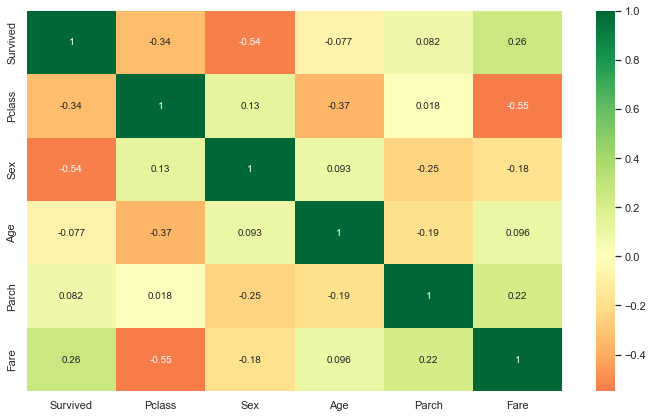

In [27]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_red.corr(), cmap='RdYlGn', annot=True, center=0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

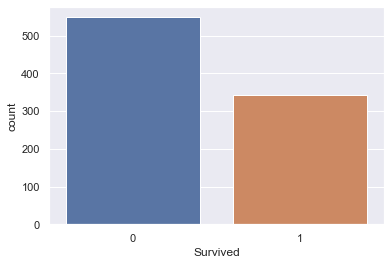

In [28]:
sns.countplot(df_red.Survived)

In [29]:
df_red.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare'], dtype='object')

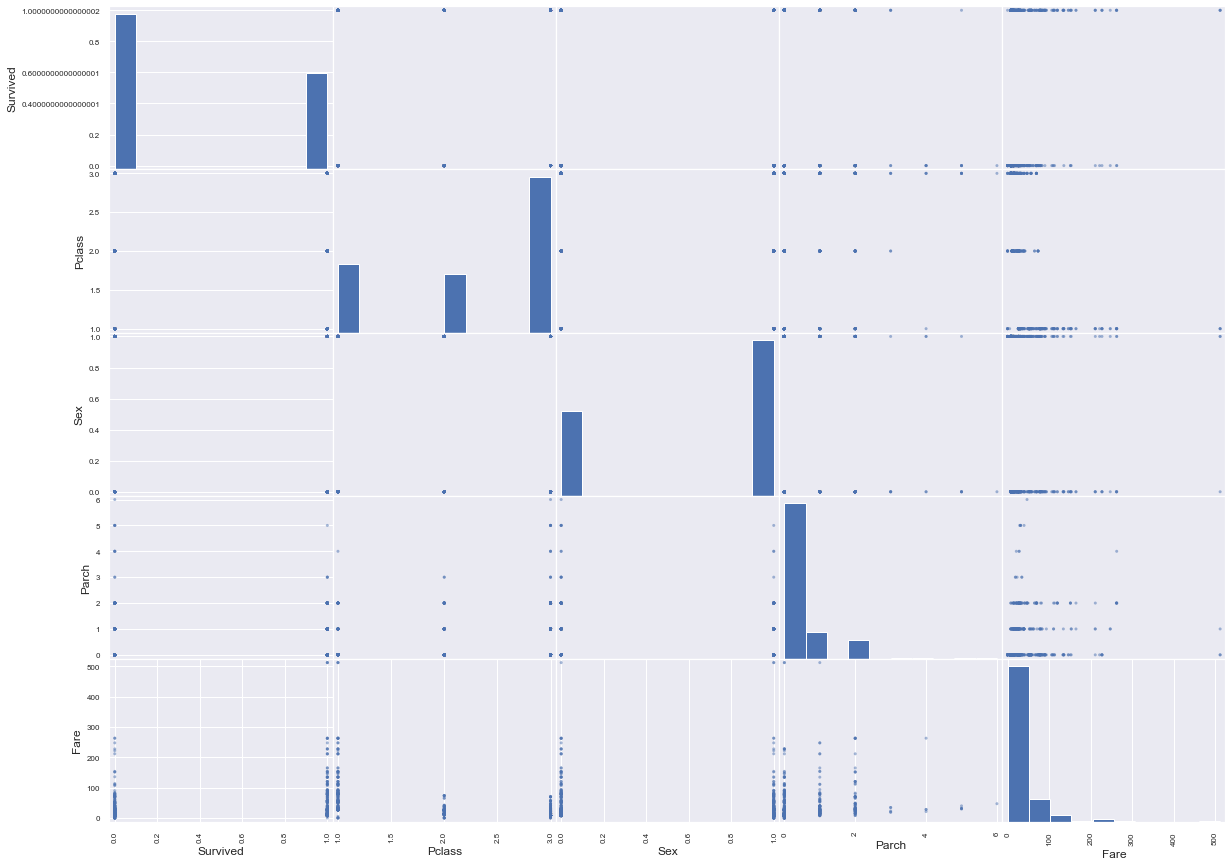

In [31]:
# We now plot the correlated feaatures to visualize the correlation
from pandas.plotting import scatter_matrix

attributes = ['Survived', "Pclass", 'Sex', 'Parch', 'Fare']
scatter_matrix(df_red[attributes], figsize=(20, 15));

In [8]:
ProfileReport(df, explorative=True, dark_mode=True, sensitive = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
rows, columns = df.shape
print(f'rows: {rows}, columns:{columns}')

(1309, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.loc[:10]

pclass  survived                                             name     sex  \
0        1         1                    Allen, Miss. Elisabeth Walton  female   
1        1         1                   Allison, Master. Hudson Trevor    male   
2        1         0                     Allison, Miss. Helen Loraine  female   
3        1         0             Allison, Mr. Hudson Joshua Creighton    male   
4        1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5        1         1                              Anderson, Mr. Harry    male   
6        1         1                Andrews, Miss. Kornelia Theodosia  female   
7        1         0                           Andrews, Mr. Thomas Jr    male   
8        1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9        1         0                          Artagaveytia, Mr. Ramon    male   
10       1         0                           Astor, Col. John Jacob    male   

        age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0   29.0000      0      0     24160  211.3375       B5        S    2    NaN   
1    0.9167      1      2    113781  151.5500  C22 C26        S   11    NaN   
2    2.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
3   30.0000      1      2    113781  151.5500  C22 C26        S  NaN  135.0   
4   25.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
5   48.0000      0      0     19952   26.5500      E12        S    3    NaN   
6   63.0000      1      0     13502   77.9583       D7        S   10    NaN   
7   39.0000      0      0    112050    0.0000      A36        S  NaN    NaN   
8   53.0000      2      0     11769   51.4792     C101        S    D    NaN   
9   71.0000      0      0  PC 17609   49.5042      NaN        C  NaN   22.0   
10  47.0000      1      0  PC 17757  227.5250  C62 C64        C  NaN  124.0   

                          home.dest  
0                      St Louis, MO  
1   Montreal, PQ / Chesterville, ON  
2   Montreal, PQ / Chesterville, ON  
3   Montreal, PQ / Chesterville, ON  
4   Montreal, PQ / Chesterville, ON  
5                      New York, NY  
6                        Hudson, NY  
7                       Belfast, NI  
8               Bayside, Queens, NY  
9               Montevideo, Uruguay  
10                     New York, NY

In [8]:
df.loc[[1,10]]

pclass  survived                            name   sex      age  sibsp  \
1        1         1  Allison, Master. Hudson Trevor  male   0.9167      1   
10       1         0          Astor, Col. John Jacob  male  47.0000      1   

    parch    ticket     fare    cabin embarked boat   body  \
1       2    113781  151.550  C22 C26        S   11    NaN   
10      0  PC 17757  227.525  C62 C64        C  NaN  124.0   

                          home.dest  
1   Montreal, PQ / Chesterville, ON  
10                     New York, NY

In [9]:
df.iloc[:10]

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0     24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2    113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2    113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
5  48.0000      0      0     19952   26.5500      E12        S    3    NaN   
6  63.0000      1      0     13502   77.9583       D7        S   10    NaN   
7  39.0000      0      0    112050    0.0000      A36        S  NaN    NaN   
8  53.0000      2      0     11769   51.4792     C101        S    D    NaN   
9  71.0000      0      0  PC 17609   49.5042      NaN        C  NaN   22.0   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
7                      Belfast, NI  
8              Bayside, Queens, NY  
9              Montevideo, Uruguay

In [10]:
df.loc[:10,["name", "sex"]]

name     sex
0                     Allen, Miss. Elisabeth Walton  female
1                    Allison, Master. Hudson Trevor    male
2                      Allison, Miss. Helen Loraine  female
3              Allison, Mr. Hudson Joshua Creighton    male
4   Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female
5                               Anderson, Mr. Harry    male
6                 Andrews, Miss. Kornelia Theodosia  female
7                            Andrews, Mr. Thomas Jr    male
8     Appleton, Mrs. Edward Dale (Charlotte Lamson)  female
9                           Artagaveytia, Mr. Ramon    male
10                           Astor, Col. John Jacob    male

In [12]:
df.iloc[:,[2,3,4]]

name     sex      age
0                       Allen, Miss. Elisabeth Walton  female  29.0000
1                      Allison, Master. Hudson Trevor    male   0.9167
2                        Allison, Miss. Helen Loraine  female   2.0000
3                Allison, Mr. Hudson Joshua Creighton    male  30.0000
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000
...                                               ...     ...      ...
1304                             Zabour, Miss. Hileni  female  14.5000
1305                            Zabour, Miss. Thamine  female      NaN
1306                        Zakarian, Mr. Mapriededer    male  26.5000
1307                              Zakarian, Mr. Ortin    male  27.0000
1308                               Zimmerman, Mr. Leo    male  29.0000

[1309 rows x 3 columns]

In [17]:
male_df = df.loc[df["sex"] == "male"]
male_df

pclass  survived                                  name   sex      age  \
1          1         1        Allison, Master. Hudson Trevor  male   0.9167   
3          1         0  Allison, Mr. Hudson Joshua Creighton  male  30.0000   
5          1         1                   Anderson, Mr. Harry  male  48.0000   
7          1         0                Andrews, Mr. Thomas Jr  male  39.0000   
9          1         0               Artagaveytia, Mr. Ramon  male  71.0000   
...      ...       ...                                   ...   ...      ...   
1302       3         0                     Yousif, Mr. Wazli  male      NaN   
1303       3         0                 Yousseff, Mr. Gerious  male      NaN   
1306       3         0             Zakarian, Mr. Mapriededer  male  26.5000   
1307       3         0                   Zakarian, Mr. Ortin  male  27.0000   
1308       3         0                    Zimmerman, Mr. Leo  male  29.0000   

      sibsp  parch    ticket      fare    cabin embarked boat   body  \
1         1      2    113781  151.5500  C22 C26        S   11    NaN   
3         1      2    113781  151.5500  C22 C26        S  NaN  135.0   
5         0      0     19952   26.5500      E12        S    3    NaN   
7         0      0    112050    0.0000      A36        S  NaN    NaN   
9         0      0  PC 17609   49.5042      NaN        C  NaN   22.0   
...     ...    ...       ...       ...      ...      ...  ...    ...   
1302      0      0      2647    7.2250      NaN        C  NaN    NaN   
1303      0      0      2627   14.4583      NaN        C  NaN    NaN   
1306      0      0      2656    7.2250      NaN        C  NaN  304.0   
1307      0      0      2670    7.2250      NaN        C  NaN    NaN   
1308      0      0    315082    7.8750      NaN        S  NaN    NaN   

                            home.dest  
1     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
5                        New York, NY  
7                         Belfast, NI  
9                 Montevideo, Uruguay  
...                               ...  
1302                              NaN  
1303                              NaN  
1306                              NaN  
1307                              NaN  
1308                              NaN  

[843 rows x 14 columns]

In [18]:
male_cabin_df = df.loc[(df["sex"] == "male") & (df["cabin"] == "A36")]
male_cabin_df

pclass  survived                    name   sex   age  sibsp  parch  ticket  \
7       1         0  Andrews, Mr. Thomas Jr  male  39.0      0      0  112050   

   fare cabin embarked boat  body    home.dest  
7   0.0   A36        S  NaN   NaN  Belfast, NI

In [10]:
df["survived"]
# But if i want to use the data in the column i can save it in a variable
survived1 = df["survived"]
survived1
#then we can also receive a data frame by passing it into a list
survived2 = df[["survived"]]
survived2

survived
0            1
1            1
2            0
3            0
4            0
...        ...
1304         0
1305         0
1306         0
1307         0
1308         0

[1309 rows x 1 columns]

In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [7]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
len(df["survived"])

1309

In [9]:
df["survived"].unique()

array([1, 0], dtype=int64)

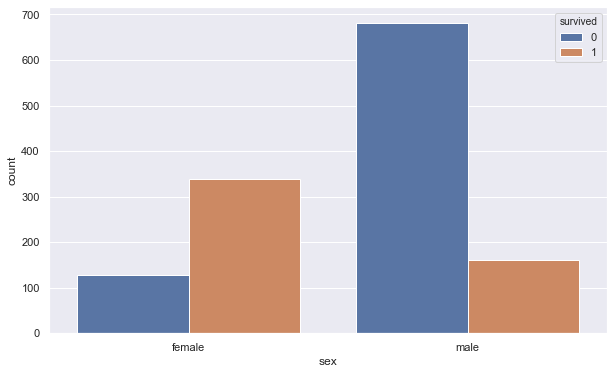

In [10]:
sns.countplot(x ="sex", hue="survived", data=df);

In [11]:
#sns.countplot(x ="age", hue="survived", data=df);

Text(0, 0.5, 'age')

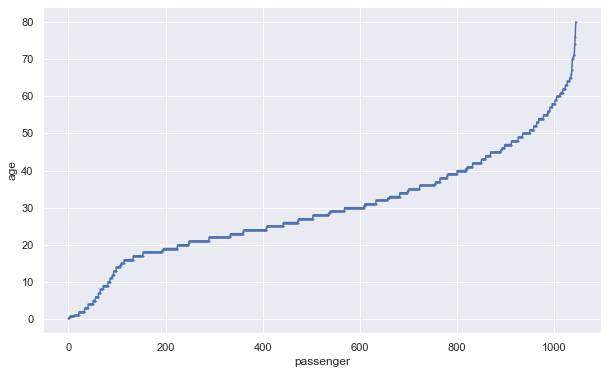

In [12]:
fig, ax = plt.subplots()

ax.plot(np.sort(df["age"]), marker="o", markersize=1)
ax.set_xlabel("passenger")
ax.set_ylabel("age")

[Text(0, 0, 'Children'),
 Text(0, 0, 'Youth'),
 Text(0, 0, 'Adult'),
 Text(0, 0, 'Seniors')]

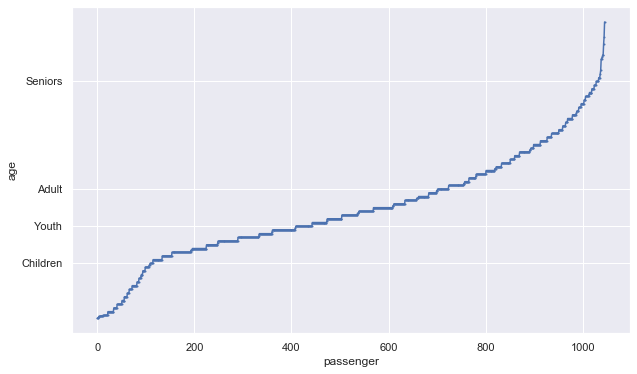

In [13]:
fig, ax = plt.subplots()

ax.plot(np.sort(df["age"]), marker="o", markersize=1)
ax.set_xlabel("passenger")
ax.set_ylabel("age")
ax.set_yticks([15, 25, 35, 64])
ax.set_yticklabels(["Children", "Youth", "Adult", "Seniors"])

[Text(0, 0, 'Thied Class'),
 Text(0, 0, 'Second Class'),
 Text(0, 0, 'First Class Berth'),
 Text(0, 0, 'First Class suite')]

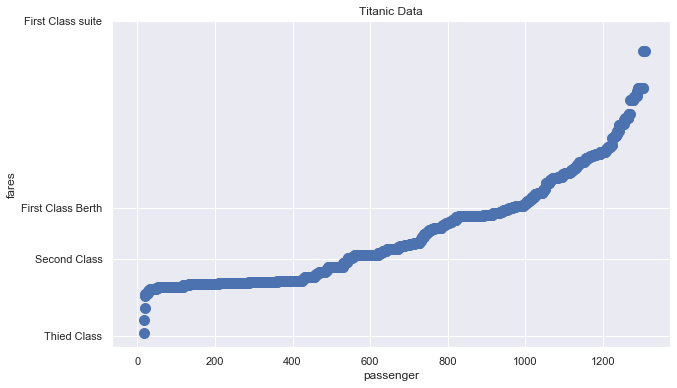

In [14]:
fig, ax = plt.subplots()

ax.plot(np.sort(df["fare"]), marker="o", markersize=10, linestyle=" ")
ax.set_title("Titanic Data")
ax.set_xlabel("passenger")
ax.set_ylabel("fares")
ax.set_yscale("log")
ax.set_yticks([3, 12, 30, 870])
ax.set_yticklabels(["Thied Class", "Second Class", "First Class Berth", "First Class suite"])

<string>:6: UserWarning: Warning: converting a masked element to nan.
C:\Users\ZURU PC\anaconda3\lib\site-packages\numpy\ma\core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
C:\Users\ZURU PC\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\ZURU PC\anaconda3\lib\site-packages\matplotlib\ticker.py:590: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


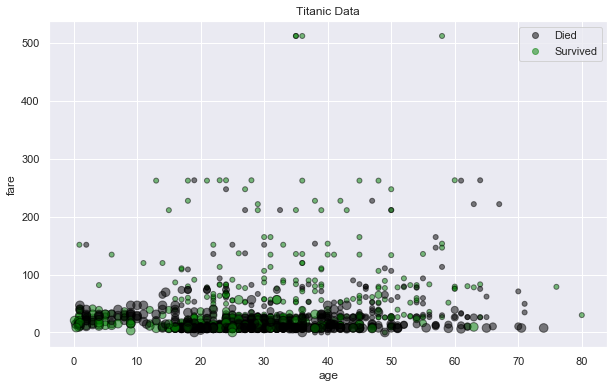

In [15]:
cmap = mcolors.ListedColormap(["black", "green"])
fig, ax = plt.subplots()

sc = ax.scatter("age", "fare", c="survived", cmap=cmap,
               alpha=0.5, edgecolor="black", 
               s = df["pclass"]*25, data=df)
ax.set(title="Titanic Data", xlabel="age", ylabel="fare")
ax.legend(handles = sc.legend_elements()[0],
         labels =["Died", "Survived"])

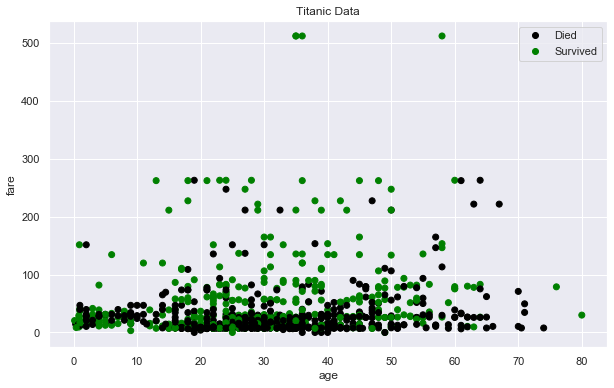

In [16]:
cmap = mcolors.ListedColormap(["black", "green"])
fig, ax = plt.subplots()

sc = ax.scatter("age", "fare", c="survived", cmap=cmap, data=df)
ax.set(title="Titanic Data", xlabel="age", ylabel="fare")
ax.legend(handles = sc.legend_elements()[0],
         labels =["Died", "Survived"])

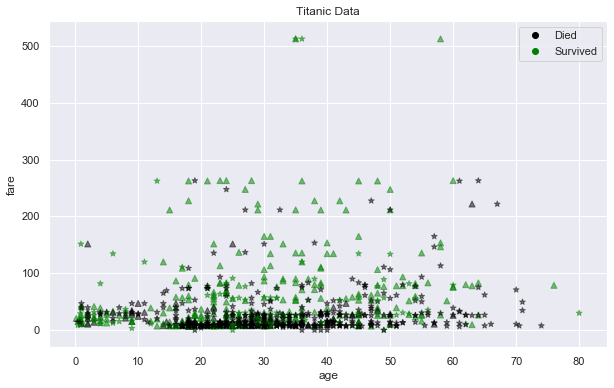

In [17]:
cmap = mcolors.ListedColormap(["black", "green"])
fig, ax = plt.subplots()

sc1 = ax.scatter("age", "fare", c="survived", marker="^", alpha=0.5,
                 cmap=cmap, label="Female", 
                 data=df[df["sex"].str.match("female")])
sc2 = ax.scatter("age", "fare", c="survived", alpha=0.5, cmap=cmap, 
                 marker="*",label="Male", 
                 data=df[df["sex"].str.match("male")])

ax.set(title="Titanic Data", xlabel="age", ylabel="fare")
ax.legend(handles = sc.legend_elements()[0],
         labels =["Died", "Survived"])

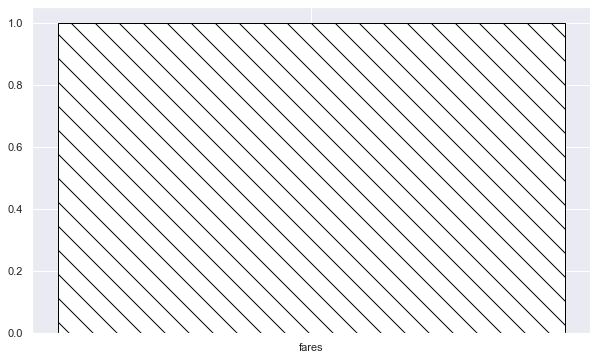

In [26]:
fig, ax = plt.subplots()
(counts, edges, _) = ax.hist("fares",
                            bins="auto",
                            edgecolor="black",
                            facecolor="white",
                            hatch="\\", data=df)

In [29]:
survived = df["survived"].value_counts()
survived

0    809
1    500
Name: survived, dtype: int64

In [30]:
sex = df["sex"].value_counts()
sex

male      843
female    466
Name: sex, dtype: int64

## Data Preprocessing

In [34]:
df_red = df[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']]
df_red.head()

Survived  Pclass     Sex   Age  Parch     Fare
0         0       3    male  22.0      0   7.2500
1         1       1  female  38.0      0  71.2833
2         1       3  female  26.0      0   7.9250
3         1       1  female  35.0      0  53.1000
4         0       3    male  35.0      0   8.0500

In [35]:
df_red.replace({'male': 1, 'female': 0}, inplace=True)

In [37]:
df_red.head()

Survived  Pclass  Sex   Age  Parch     Fare
0         0       3    1  22.0      0   7.2500
1         1       1    0  38.0      0  71.2833
2         1       3    0  26.0      0   7.9250
3         1       1    0  35.0      0  53.1000
4         0       3    1  35.0      0   8.0500

## Modelling

In [44]:
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
features = df_red.drop('Survived', axis = 1)
label = df_red.Survived

In [46]:
#Try other models to figure out which one gives the best score using GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
#from catboost import CatBoostRegressor

#We now write a function

def find_best_model_using_gridsearchcv(features, label):
    algos = {
        "LGBM":{
            "model":LGBMClassifier(),
            "params":{
                "num_leaves":[21, 31, 41],
                "max_depth": [1, 2, -1,],
                "learning_rate": [0.1, 0.01],
                "n_estimators": [10, 100]
               
            }
        },
        
        "XGBoost": {
            "model": XGBClassifier(),
            "params": {
                "max_depth":[1, 2, -1],
                "learning_rate":[0.1, 0.01, 0.001]
                
            }
        },
                
        "RandomForest": {
            "model": RandomForestClassifier(),
            "params": {
                'bootstrap': [False],
                'n_estimators': [3, 10],
                'max_features': [2, 3, 4]
                
            }
        },
        
        "Decision_Tree": {
            "model": DecisionTreeClassifer(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        }

    }
    #To save the model into a dataframe
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(features, label)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model","best_score", "best_params"])

# Calling the function

find_best_model_using_gridsearchcv(features, label)
    

NameError: name 'DecisionTreeClassifer' is not defined